In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Y dataset')

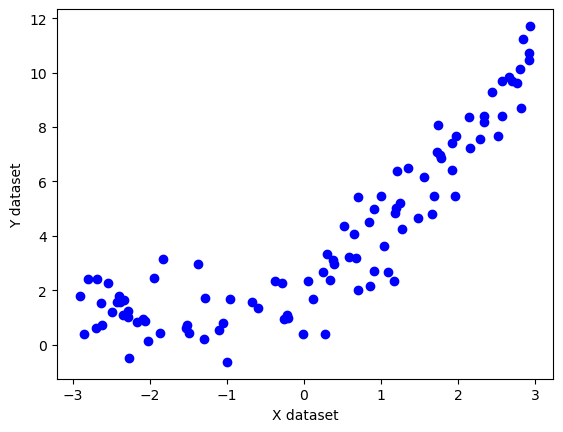

In [6]:
X = 6 * np.random.rand(100, 1) - 3  
y = 0.5 * X ** 2 + 1.5 * X + 2 + np.random.randn(100, 1)
# quadratic equation used y = 0.5x^2 + 1.5x + 2 +outlier
plt.scatter(X, y, color ='b')
plt.xlabel('X dataset')
plt.ylabel('Y dataset')

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=10)

In [9]:
# trying with simple linear regression
from sklearn.linear_model import LinearRegression
l1 = LinearRegression()
l1.fit(x_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score
score = r2_score(y_test, l1.predict(x_test))
print(score)

0.7453541938445614


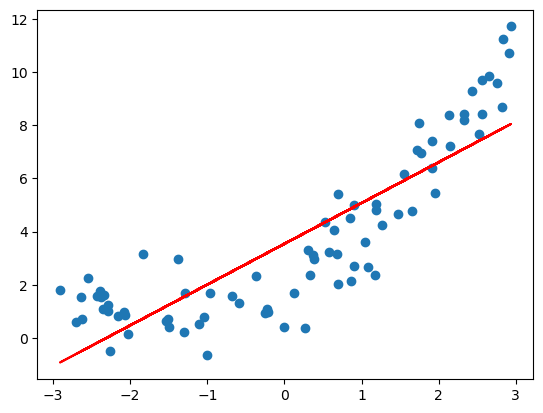

In [14]:
plt.plot(x_train, l1.predict(x_train), "r")
plt.scatter(x_train, y_train)

In [15]:
# applying polynomial transformation
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [16]:
reg = LinearRegression()
reg.fit(x_train_poly, y_train)
y_pred = reg.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.9144087604239018


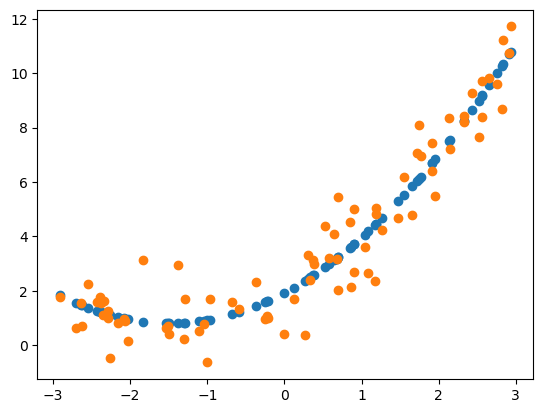

In [18]:
plt.scatter(x_train, reg.predict(x_train_poly))
plt.scatter(x_train, y_train)

In [21]:
poly3 = PolynomialFeatures(degree=3, include_bias=True)
x_train_poly = poly3.fit_transform(x_train)
x_test_poly = poly3.transform(x_test)

0.9124164962312249


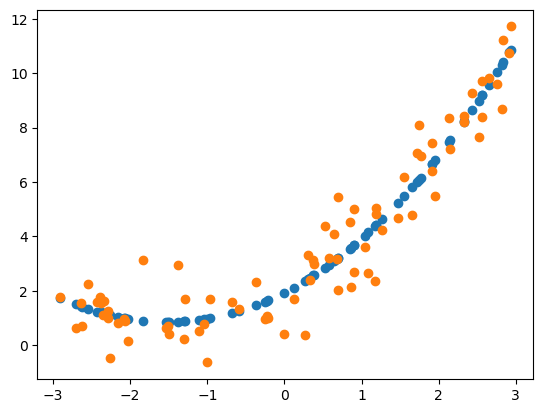

In [22]:
reg = LinearRegression()
reg.fit(x_train_poly, y_train)
y_pred = reg.predict(x_test_poly)
score = r2_score(y_test, y_pred)
print(score)
plt.scatter(x_train, reg.predict(x_train_poly))
plt.scatter(x_train, y_train)

PIPELINE CONCEPTS

In [33]:
from sklearn.pipeline import Pipeline

def poly_reg(degree):
    x_new = np.linspace(-3, 3, 200).reshape(-1, 1)  # Reshape correctly
    poly_features = PolynomialFeatures(degree=degree, include_bias=True)
    linReg = LinearRegression()
    
    polyReg = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", linReg)
    ])

    polyReg.fit(x_train, y_train)
    y_pred = polyReg.predict(x_new)

    plt.plot(x_new, y_pred, 'r', label=f"Degree {degree}")
    plt.scatter(x_train, y_train, color='b', label="Training Data")
    plt.scatter(x_test, y_test, color='g', label="Test Data")

    plt.legend(loc='upper left')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.axis([-4, 4, 0, 10])
    plt.show()

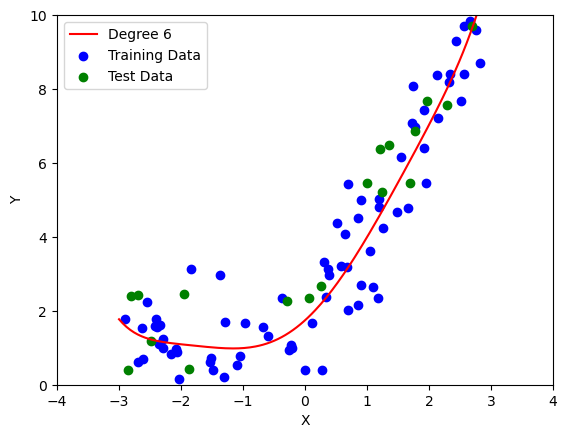

In [40]:
poly_reg(6)